# Bank Customer Churn Modelling

Predicting customer churn using this [kaggle dataset](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Understanding the dataset

In [2]:
bank_data = pd.read_csv("churn_modelling.csv");
display(bank_data.shape) # rows & columns

(10000, 14)

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

There are 10000 records. Both RowNumber and CustomerId are unique throughout the entire set, therefore we will remove them. Surname also should not have any information (unless we are profiling by name, which we will not).

In [5]:
display(bank_data.isnull().sum()) # display missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
display(bank_data.nunique()) # display unique values

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

There are 10000 rows and no missing values. CustomerID and RowNumber are both unique and can be removed. Surname will also be removed.

In [7]:
bank_data.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True);

## Visualization

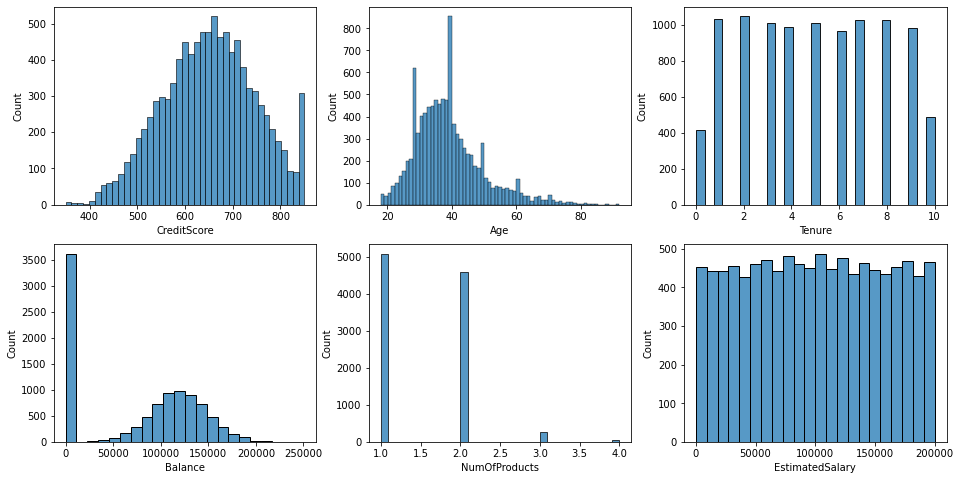

In [8]:
# Display all numeric values
fig, axes = plt.subplots(2, 3, figsize=(16, 8));
sns.histplot(ax=axes[0, 0], data=bank_data["CreditScore"]);
sns.histplot(ax=axes[0, 1], data=bank_data["Age"]);
sns.histplot(ax=axes[0, 2], data=bank_data["Tenure"]);
sns.histplot(ax=axes[1, 0], data=bank_data["Balance"]);
sns.histplot(ax=axes[1, 1], data=bank_data["NumOfProducts"]);
sns.histplot(ax=axes[1, 2], data=bank_data["EstimatedSalary"]);

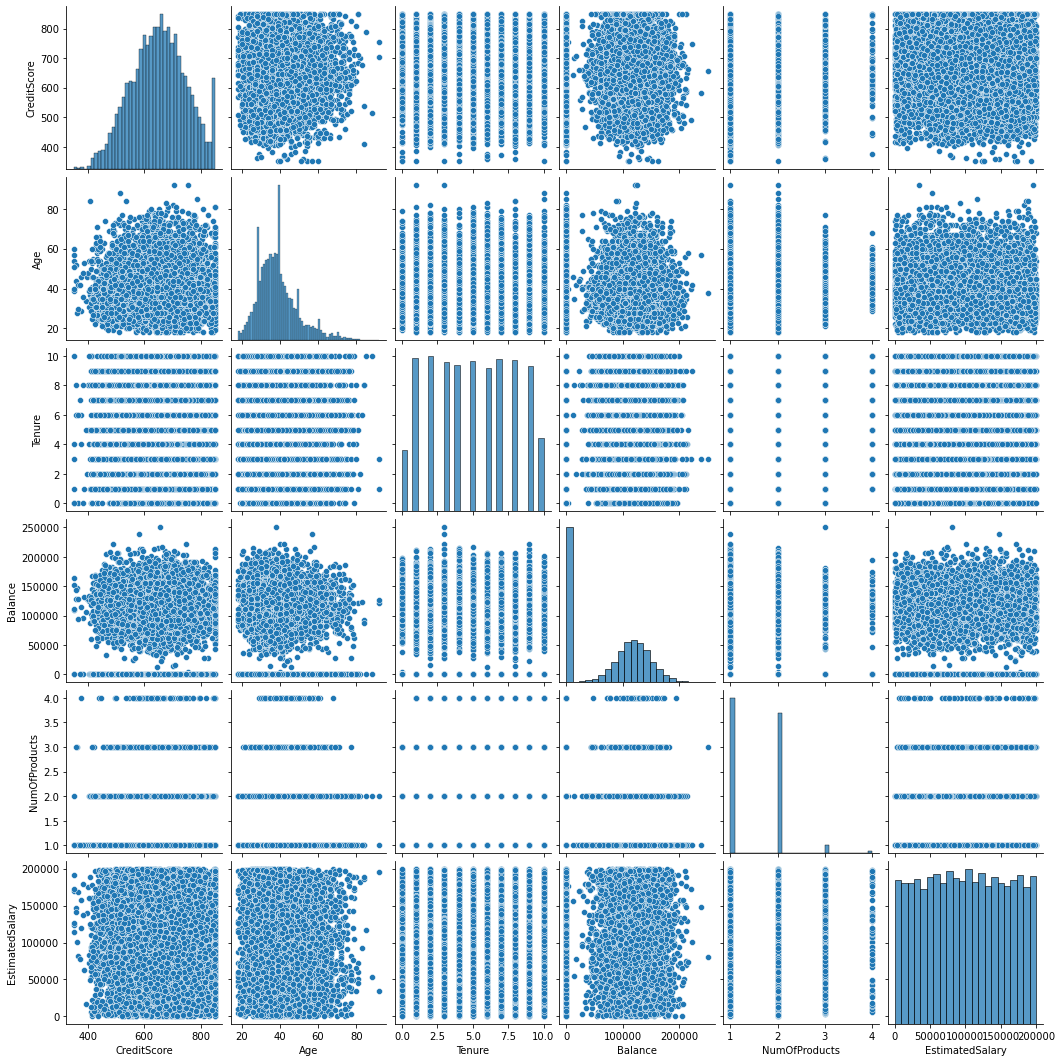

In [9]:
# Plot all numerical variables versus each other
sns.pairplot(bank_data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]);

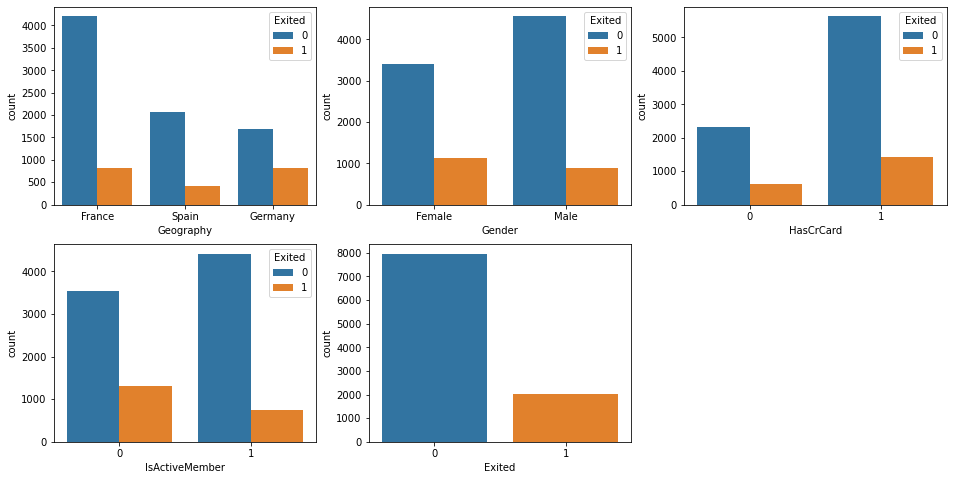

In [24]:
# Plot the categorical variables
fig, axes = plt.subplots(2, 3, figsize=(16, 8));
sns.countplot(ax=axes[0, 0], data=bank_data, x="Geography", hue="Exited");
sns.countplot(ax=axes[0, 1], data=bank_data, x="Gender", hue="Exited");
sns.countplot(ax=axes[0, 2], data=bank_data, x="HasCrCard", hue="Exited");
sns.countplot(ax=axes[1, 0], data=bank_data, x="IsActiveMember", hue="Exited");
sns.countplot(ax=axes[1, 1], data=bank_data, x="Exited");
fig.delaxes(axes[1][2]);

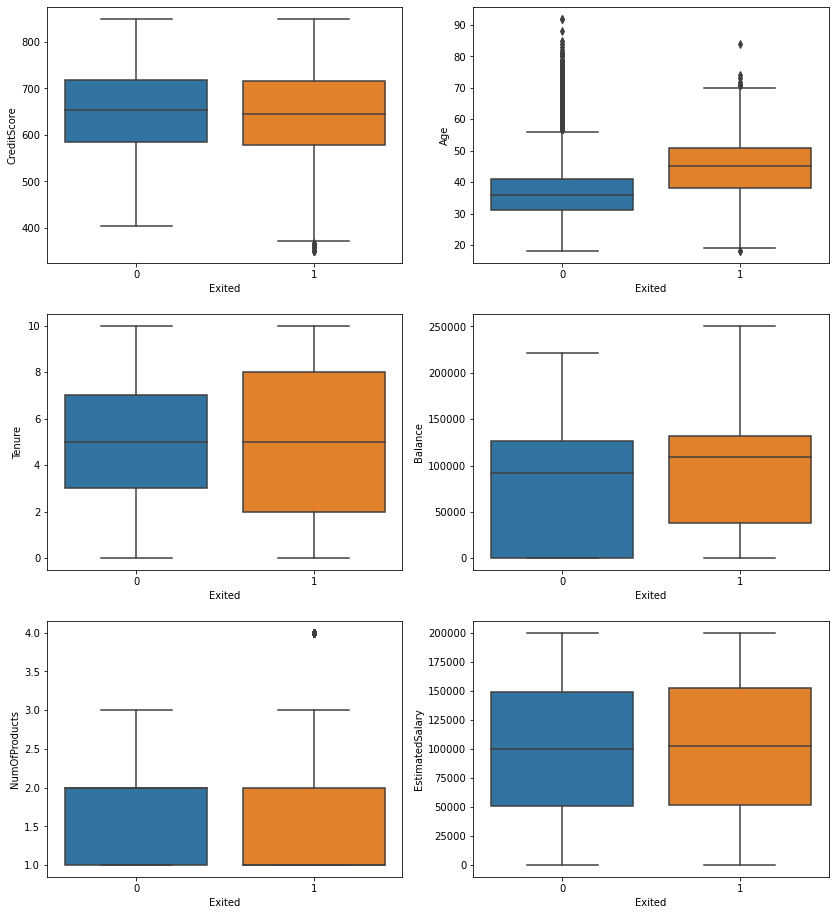

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(14, 16));
sns.boxplot(ax=axes[0, 0], data=bank_data, x="Exited", y="CreditScore");
sns.boxplot(ax=axes[0, 1], data=bank_data, x="Exited", y="Age");
sns.boxplot(ax=axes[1, 0], data=bank_data, x="Exited", y="Tenure");
sns.boxplot(ax=axes[1, 1], data=bank_data, x="Exited", y="Balance");
sns.boxplot(ax=axes[2, 0], data=bank_data, x="Exited", y="NumOfProducts");
sns.boxplot(ax=axes[2, 1], data=bank_data, x="Exited", y="EstimatedSalary");

In [12]:
display(pd.crosstab(bank_data["Exited"], bank_data["Geography"], margins=True, normalize=False))
display(pd.crosstab(bank_data["Exited"], bank_data["Geography"], margins=True, normalize=True))

Geography,France,Germany,Spain,All
Exited,,,,
0,4204,1695,2064,7963
1,810,814,413,2037
All,5014,2509,2477,10000


Geography,France,Germany,Spain,All
Exited,,,,
0,0.4204,0.1695,0.2064,0.7963
1,0.0810,0.0814,0.0413,0.2037
All,0.5014,0.2509,0.2477,1.0000


In [13]:
display(pd.crosstab(bank_data["Exited"], bank_data["Gender"], margins=True, normalize=False))
display(pd.crosstab(bank_data["Exited"], bank_data["Gender"], margins=True, normalize=True))

Gender,Female,Male,All
Exited,,,
0,3404,4559,7963
1,1139,898,2037
All,4543,5457,10000


Gender,Female,Male,All
Exited,,,
0,0.3404,0.4559,0.7963
1,0.1139,0.0898,0.2037
All,0.4543,0.5457,1.0000


In [14]:
display(pd.crosstab(bank_data["Exited"], bank_data["HasCrCard"], margins=True, normalize=False))
display(pd.crosstab(bank_data["Exited"], bank_data["HasCrCard"], margins=True, normalize=True))

HasCrCard,0,1,All
Exited,,,
0,2332,5631,7963
1,613,1424,2037
All,2945,7055,10000


HasCrCard,0,1,All
Exited,,,
0,0.2332,0.5631,0.7963
1,0.0613,0.1424,0.2037
All,0.2945,0.7055,1.0000


In [15]:
display(pd.crosstab(bank_data["Exited"], bank_data["IsActiveMember"], margins=True, normalize=False))
display(pd.crosstab(bank_data["Exited"], bank_data["IsActiveMember"], margins=True, normalize=True))

IsActiveMember,0,1,All
Exited,,,
0,3547,4416,7963
1,1302,735,2037
All,4849,5151,10000


IsActiveMember,0,1,All
Exited,,,
0,0.3547,0.4416,0.7963
1,0.1302,0.0735,0.2037
All,0.4849,0.5151,1.0000


## Correlation

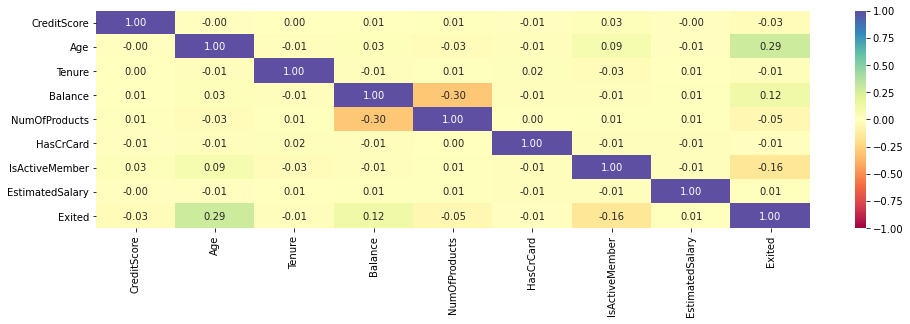

In [16]:
plt.figure(figsize=(16,4));
sns.heatmap(bank_data.corr(), annot=True, fmt=".2f", vmin=-1.0, vmax=1, cmap="Spectral");

# Transformation

In [17]:
bank_data_transformed = bank_data;

## Log_Balance
Need to change all 0 balances to 1. This will still be valid for all of the data.

In [18]:
print("         Balance < 0: ", bank_data_transformed[bank_data_transformed["Balance"].lt(0)].shape[0])
print("         Balance = 0: ", bank_data_transformed[bank_data_transformed["Balance"].eq(0)].shape[0])
print("1 <= Balance <= 1000: ", bank_data_transformed[bank_data_transformed["Balance"].between(1, 1000)].shape[0])

         Balance < 0:  0
         Balance = 0:  3617
1 <= Balance <= 1000:  0


In [19]:
bank_data_transformed["Balance_1"] = bank_data_transformed["Balance"].replace(0, 1);
print("         Balance_1 = 0: ", bank_data_transformed[bank_data_transformed["Balance_1"].eq(0)].shape[0])
print("         Balance_1 = 1: ", bank_data_transformed[bank_data_transformed["Balance_1"].eq(1)].shape[0])

         Balance_1 = 0:  0
         Balance_1 = 1:  3617


In [20]:
bank_data_transformed["Log10_Balance_1"] = np.log10(bank_data_transformed["Balance_1"]);

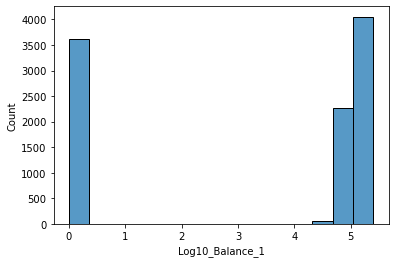

In [21]:
sns.histplot(data=bank_data_transformed["Log10_Balance_1"]);

## One-Hot Encoding

In [22]:
bank_data_transformed = pd.concat([bank_data_transformed,pd.get_dummies(bank_data_transformed['Geography'], prefix='Geography')],axis=1)
bank_data_transformed = pd.concat([bank_data_transformed,pd.get_dummies(bank_data_transformed['Gender'], prefix='Gender')],axis=1)
bank_data_transformed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_1,Log10_Balance_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.00,0.000000,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,83807.86,4.923285,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,159660.80,5.203198,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.00,0.000000,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,125510.82,5.098681,0,0,1,1,0


# Principal Component Analysis (Optional)

# Partitioning (60:20:20)

In [27]:
seed=12345
bdt_train = bank_data_transformed.sample(frac=0.6, random_state=seed) # Train 60%
bdt_test = bank_data_transformed.drop(bdt_train.index)

bdt_validate = bdt_test.sample(frac=0.5,random_state=seed)   # Validate = 50% of remaining 40% ==> 20%
bdt_test = bdt_test.drop(bdt_validate.index)                  # Test = 20%

print("training set: ", len(bdt_train))
print("validation set: ", len(bdt_validate))
print("test set: ", len(bdt_test))

display(bdt_train.head());
display(bdt_validate.head());
display(bdt_test.head());

training set:  6000
validation set:  2000
test set:  2000


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_1,Log10_Balance_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7867,640,Spain,Female,46,3,0.00,1,1,1,156260.08,0,1.00,0.000000,0,0,1,1,0
1402,757,France,Male,29,8,130306.49,1,1,0,77469.38,0,130306.49,5.114966,1,0,0,0,1
8606,807,Spain,Male,42,5,0.00,2,1,1,74900.90,0,1.00,0.000000,0,0,1,0,1
8885,668,Spain,Male,45,4,102486.21,2,1,1,158379.25,0,102486.21,5.010665,0,0,1,0,1
6494,699,France,Male,28,7,0.00,2,1,1,22684.78,0,1.00,0.000000,1,0,0,0,1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_1,Log10_Balance_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9750,708,France,Female,51,8,70754.18,1,1,1,92920.04,1,70754.18,4.849752,1,0,0,1,0
1129,669,France,Female,35,7,0.00,1,1,1,49108.23,1,1.00,0.000000,1,0,0,1,0
2762,719,Germany,Male,28,3,106070.29,2,1,1,183893.31,0,106070.29,5.025594,0,1,0,0,1
4911,407,Spain,Male,37,1,0.00,1,1,1,49161.12,1,1.00,0.000000,0,0,1,0,1
1306,823,Spain,Female,46,3,81576.75,1,1,1,28370.95,1,81576.75,4.911566,0,0,1,1,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_1,Log10_Balance_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,115046.74,5.060874,0,1,0,1,0
12,476,France,Female,34,10,0.00,2,1,0,26260.98,0,1.00,0.000000,1,0,0,1,0
17,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,1.00,0.000000,0,0,1,1,0
25,577,France,Male,25,3,0.00,2,0,1,124508.29,0,1.00,0.000000,1,0,0,0,1
27,571,France,Male,44,9,0.00,2,0,0,38433.35,0,1.00,0.000000,1,0,0,0,1


# Prediction

## Logistic Regression

### Simple Logistic Regression

### Logistic Regression with Log_Balance and Regularization (Optional)

## k-NN

## Ensemble

## Neural Network (Optional)

# Comparison